# Exploratory Data Analysis and Visualization

[Resource](https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-3/)



In [65]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [66]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

import numpy as np
import scipy as np
import matplotlib as mpl
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## Getting the mtcars dataset into shape

In [67]:
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


There's an ugly poorly named column. Let's fix that.

In [68]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [69]:
dfcars.shape

(32, 12)

We parse out a maker, which we shall later use to group cars.

In [70]:
dfcars['maker'] = dfcars.name.apply(lambda x: x.split()[0]) # Keeps the maker and adds it as a new column
dfcars['maker']

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

In [71]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


We can construct the `av_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean:

In [72]:
av_mpg = dfcars.groupby("maker").mpg.mean() # Note this dot notation for later
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

## Simple EDA

(as provided by Chris, a previous head-TF for cs109)

He says:

I'd like to suggest a basic rubric for the early stages of exploratory data analysis in Python. This isn't universally applicable, but it does cover many patterns which recur in several data analysis contexts. It's useful to keep this rubric in mind when encountering a new dataset.

The basic workflow is as follows:

1. Build a DataFrame from the data (ideally, put all data in this object)
2. Clean the DataFrame. It should have the following properties:
* Each row describes a single object
* Each column describes a property of that object
* Columns are numeric whenever appropriate
* Columns contain atomic properties that cannot be further decomposed
3. Explore global properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore group properties. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

So far we have built the dataframe, and carried out very minimal cleaning (renaming) in this dataframe.

## Exploring global properties

So lets focus on visualizing global properties of the data set below. For now, we shall only focus on mpg to illustrate the concepts, but you want to be doing this for all the columns. It may identify interesting properties and even errors in the data.

While we do this we shall see several examples of the `matplotlib` plotting experience.

We first use seaborn to set the global matplotlib plotting context. Here we set it to notebook which makes for reasonable sized graphics.

In [73]:
sns.set_context("notebook")
sns.set_color_codes()

Now we see maplotlib's default color palette, 'viridis'.

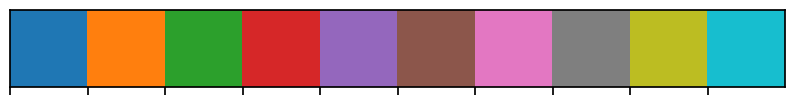

In [74]:
sns.palplot(sns.color_palette())

We can choose other palettes. The default palette is for qualitative data. It creates a color cycle we use in our plots. In other words, as we plot multiple things in a plot, it will use these colors one-by-one.

## Bar charts

We see that Pandas series are able to give us bar graphs.

<Axes: ylabel='maker'>

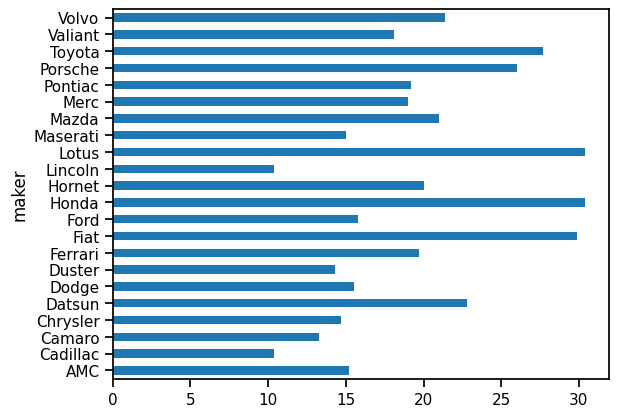

In [75]:
av_mpg.plot(kind='barh')

he then goes on to do some fancy plot visual changes. Waste of time. Let's move on.

## Histograms

Numerical data leads to distributions, and distributions to histograms. Here's the pandas default:

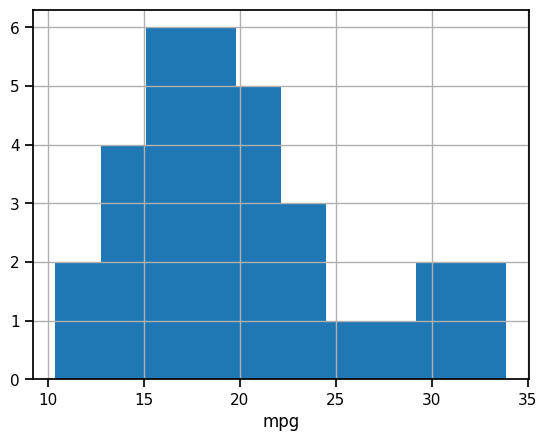

In [76]:
dfcars.mpg.hist()
plt.xlabel("mpg")
plt.show();

And matplotlib:

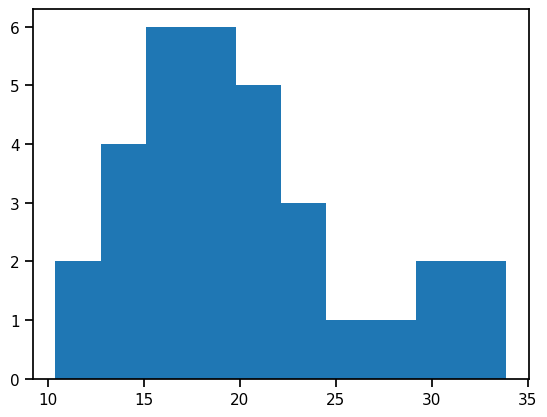

In [77]:
plt.hist(dfcars.mpg.values);

He then goes on to style it with seaborn. Yet another instance of wasted time. Main thing you need to know is that using the `values` method converts the data to a `numpy` array. Let's move on. 

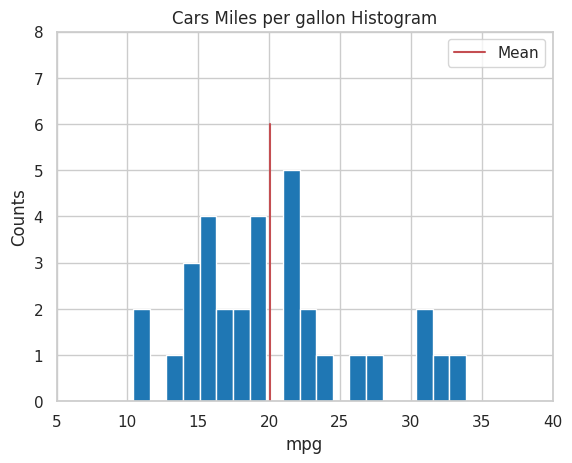

In [78]:
with sns.axes_style("whitegrid"):
    plt.hist(dfcars.mpg.values, bins=20)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

One can set bins using a list, and also label the histogram (not recommended but just for illustration). We also illustrate how to capture the color used and use it again

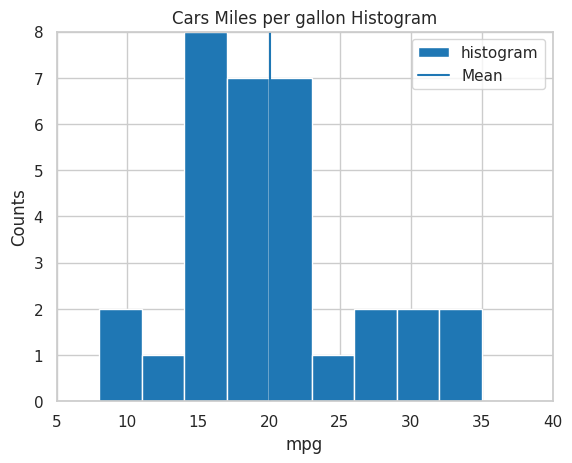

In [79]:

with sns.axes_style("whitegrid"):
    color = sns.color_palette()[0]
    plt.hist(dfcars.mpg.values, bins=range(5, 40, 3), label="histogram", color=color)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 1.0, color=color, label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

Seaborn very handily provides Kernel Density Estimates (KDE) which try to infer a probability distribution from the data. This is more useful when you have lots of data.

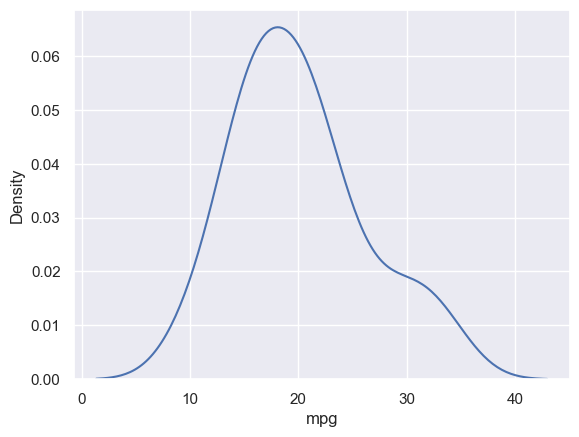

In [80]:
sns.set()
sns.kdeplot(dfcars.mpg);

And a histogram and a kdeplot together:

/var/folders/m_/f7m4q3pj7j3f6tby_sb7n5280000gn/T/ipykernel_5002/1170275590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfcars.mpg);


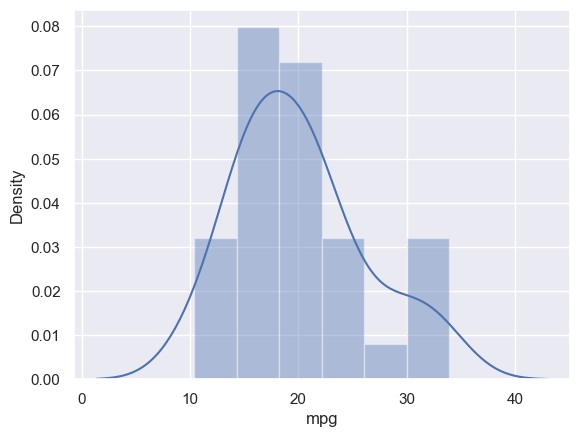

In [81]:
sns.distplot(dfcars.mpg);

## Plotting features against other features

Sometimes we want to see co-variation amongst our columns. A scatter-plot does this for us.

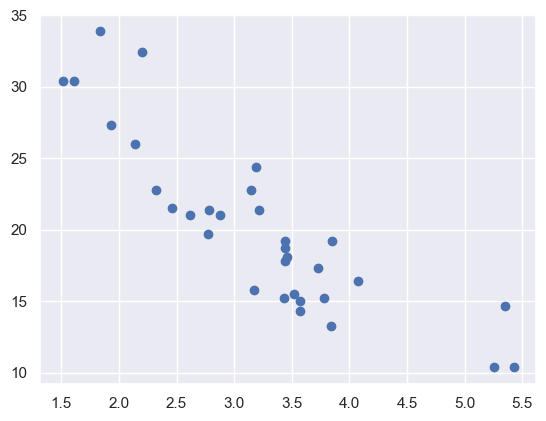

In [82]:
plt.scatter(dfcars.wt, dfcars.mpg)

We can also use `plot` without lines:

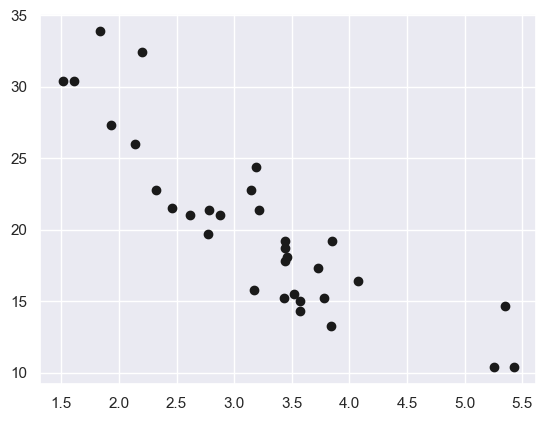

In [84]:
plt.plot(dfcars.wt, dfcars.mpg, marker="o", linestyle="None", color="k");

Usually we use `plt.show()` at the end of every plot to show the plot. Our magic incantation `%matplotlib inline` takes care of this for us, and we dont have to doit in the jupyter notebook. But if you run your puthon program from a file, you will need to explicitly have a call to show. Does not hurt us to include it...